In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import cv2 as cv

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cam = cv.VideoCapture(0)

In [36]:
def get_image():
    ret, frame = cam.read()
    rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    small_image = cv.resize(rgb_frame[0:720, 280:1000], dsize=(299,299))
    plt.imshow(small_image)
    small_image_f32 = np.float32(small_image)
    small_image_f32_r3 = np.expand_dims(small_image_f32, 0)
    scaled_image = small_image_f32_r3/255
    return scaled_image

In [9]:
iv3 = keras.applications.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

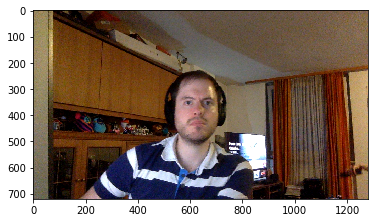

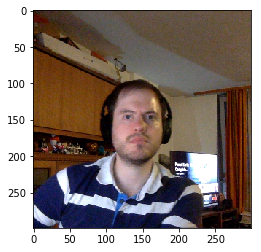

In [30]:
im = get_image()

In [32]:
def predict_image(im):
    prediction = iv3.predict(im)
    return keras.applications.inception_v3.decode_predictions(prediction)

In [33]:
predict_image(im)

[[('n04404412', 'television', 0.10588492),
  ('n03180011', 'desktop_computer', 0.04914172),
  ('n03877472', 'pajama', 0.039106272),
  ('n04270147', 'spatula', 0.035298742),
  ('n02786058', 'Band_Aid', 0.021962421)]]

In [34]:
def capture_and_predict():
    im = get_image()
    prediction = predict_image(im)
    name = prediction[0][1]
    return name

('n04557648', 'water_bottle', 0.10593755)

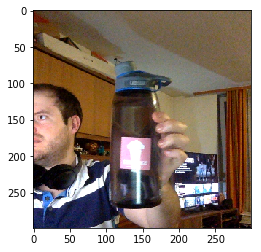

In [42]:
capture_and_predict()